# Data Exploration

## Library imports

In [8]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import importlib 

from pathlib import Path 

In [9]:
# import other libraries 
# check if jcds library is installed
package_name = "jcds"

if importlib.util.find_spec(package_name) is None:
    print(f" '{package_name}' not found. Installing from Github... ")
    subprocess.check_call(
        [
            sys.executable,
            "-m",
            "pip",
            "install",
            "https://github.com/junclemente/jcds.git",
        ]
    )
else:
    print(f" '{package_name}' is already installed.")

from jcds import eda as jeda
from jcds import reports as jrep

 'jcds' is already installed.


## Import dataset

In [10]:
data_folder = Path("../data")

df = pd.read_pickle(data_folder / "ews_dataset.pkl")

id_columns = ['cdscode', 'latitude', 'longitude', 'county']

df = df.drop(columns=id_columns)

df.head()

,virtual,magnet,yearroundyn,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,N,N,N,N,394.0,92.4,73.9,22.8,2.3,1.0,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,N,N,N,N,284.0,95.1,67.8,21.5,3.5,0.0,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,N,N,N,Y,861.0,90.5,62.3,12.1,8.1,0.8,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,N,N,N,N,672.0,96.4,72.8,25.0,2.2,0.0,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,V,N,N,N,31.0,100.0,64.5,6.5,0.0,0.0,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


## Basic dataset info


In [11]:
jrep.data_info(df, show_columns=True)


SHAPE:
There are 1067 rows and 42 columns (0.55 MB).

DUPLICATES:
There are 6 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 4
 * float: 38
There are 38 numerical (int/float/bool) variables.
 * Columns: ['cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'avg_safety_score', 'high_conn', 'low_conn', 'co

## Cardinality

In [12]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 42

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['yearroundyn']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 3 constant columns.
 * Columns: ['high_conn', 'low_conn', 'conn_ratio']
There are 4 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn', 'high_conn', 'low_conn', 'conn_ratio']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 4 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


## Data Quality

In [13]:
jrep.data_quality(df, show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 44814
 * Memory usage: 0.55 MB
 * Rows: 1067
 * Columns: 42

MISSING DATA:
 * Total entries: 3179 missing (7.1%)

ROWS:
----------
 * Rows missing any: 331
 * Rows missing all: 0

DUPLICATES: 6

COLUMNS:
----------------
Columns missing any: 35
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'stu_psv_ratio': 164 missing (15.4%)
	'stu_adm_ratio': 157 missing (14.7%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
	'stu_tch_ratio': 97 missing (9.1%)
	'pct_associate': 96 missing (9.0%)
	'pct_bachelors': 96 missing (9.0%)
	'pct_bachelors_plus': 96 missing (9.0%)
	'pct_master': 96 missing (9.0%)
	'pct_master_plus': 96 missing (9.0%)
	'pct_doctorate': 96 missing (9.0%)
	'pct_juris_doctor': 96 missing (9.0%)
	'pct_no_degree': 96 missing (9.0%)
	'pct_experienced': 96 missing (9.0%)
	'pct_inexperienced': 96 missing (9.0%)
	'pct_first_

In [14]:
# list features and target
target = "regular_hs_diploma_graduates_rate"

# create categorical feature of target variable
df["target_grad_category"] = np.where(
    df[target] >= 80, 
    'Graduated / On Track', 
    'Not Graduated / At Risk'
)

num_cols = df.select_dtypes(include='number').columns.to_list()

cat_cols = df.select_dtypes(exclude='number').columns.to_list()

# Univariate Analysis

## Numerical Features

In [15]:
df_num = df[num_cols].copy()

df_num.head()

,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,eligible_cumulative_enrollment,unexcused_absences_percent,outofschool_suspension_absences_percent,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,394.0,92.4,73.9,22.8,2.3,1.0,12.7,1841.0,23.5,0.5,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,284.0,95.1,67.8,21.5,3.5,0.0,70.3,1192.0,46.2,0.4,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,861.0,90.5,62.3,12.1,8.1,0.8,5.2,3281.0,24.1,0.0,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,672.0,96.4,72.8,25.0,2.2,0.0,3.5,2771.0,28.0,0.9,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,31.0,100.0,64.5,6.5,0.0,0.0,8.3,420.0,19.1,3.8,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


In [17]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cohortstudents,991.0,362.837538,1.991024e+02,11.000000,200.000000,376.000000,500.500000,1044.000000
regular_hs_diploma_graduates_rate,991.0,91.869828,7.276695e+00,0.000000,89.300000,93.800000,96.600000,100.000000
met_uccsu_grad_reqs_rate,991.0,52.392230,1.894189e+01,0.000000,40.350000,53.000000,65.250000,100.000000
seal_of_biliteracy_rate,991.0,15.166700,1.280911e+01,0.000000,5.350000,13.700000,22.300000,84.700000
dropout_rate,991.0,4.551968,4.912416e+00,0.000000,1.300000,3.000000,6.300000,38.500000
still_enrolled_rate,991.0,1.590111,3.668865e+00,0.000000,0.000000,0.800000,2.000000,96.300000
chronicabsenteeismrate,1021.0,14.960627,1.489501e+01,0.000000,4.700000,11.000000,20.200000,85.000000
eligible_cumulative_enrollment,1020.0,1607.253922,8.682273e+02,13.000000,904.000000,1696.000000,2217.000000,4742.000000
unexcused_absences_percent,1020.0,40.230980,1.784422e+01,0.000000,27.600000,38.200000,50.225000,99.900000
outofschool_suspension_absences_percent,1020.0,1.100882,9.534449e-01,0.000000,0.400000,0.900000,1.525000,8.900000


### Histogram and KDE Plots

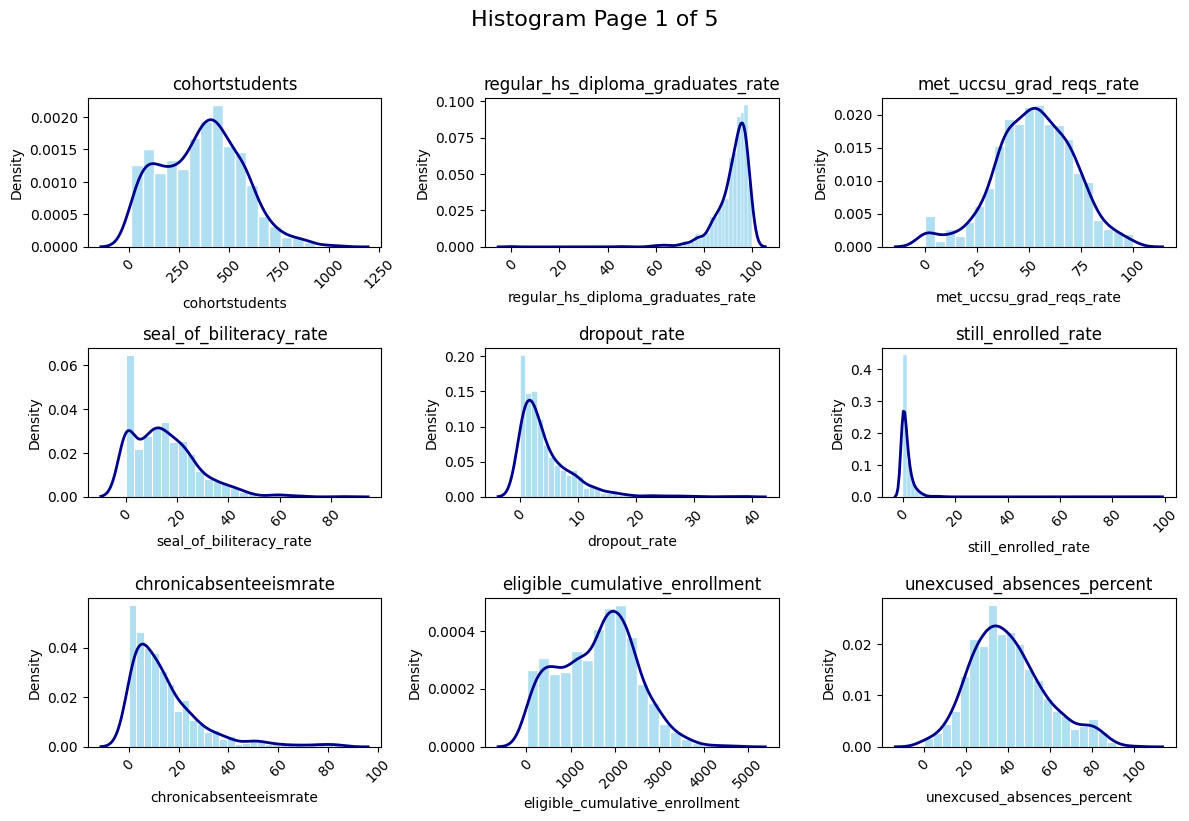

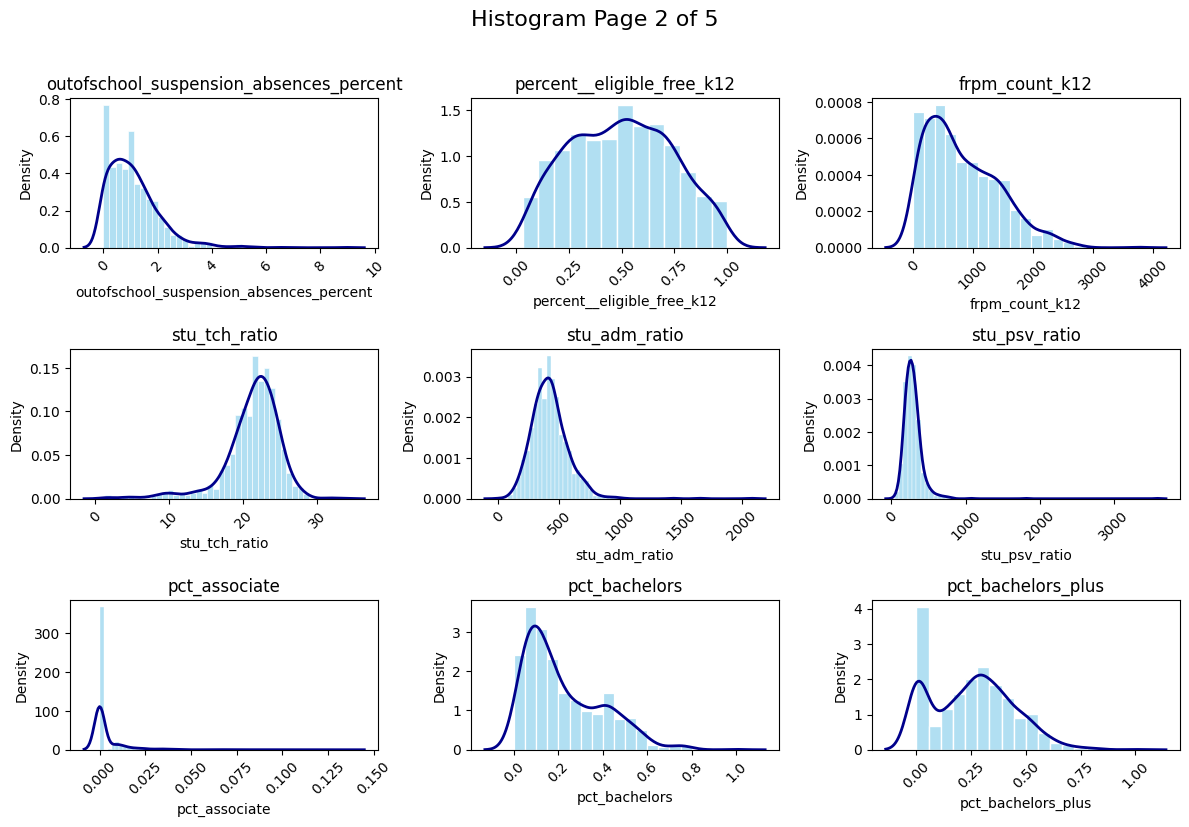

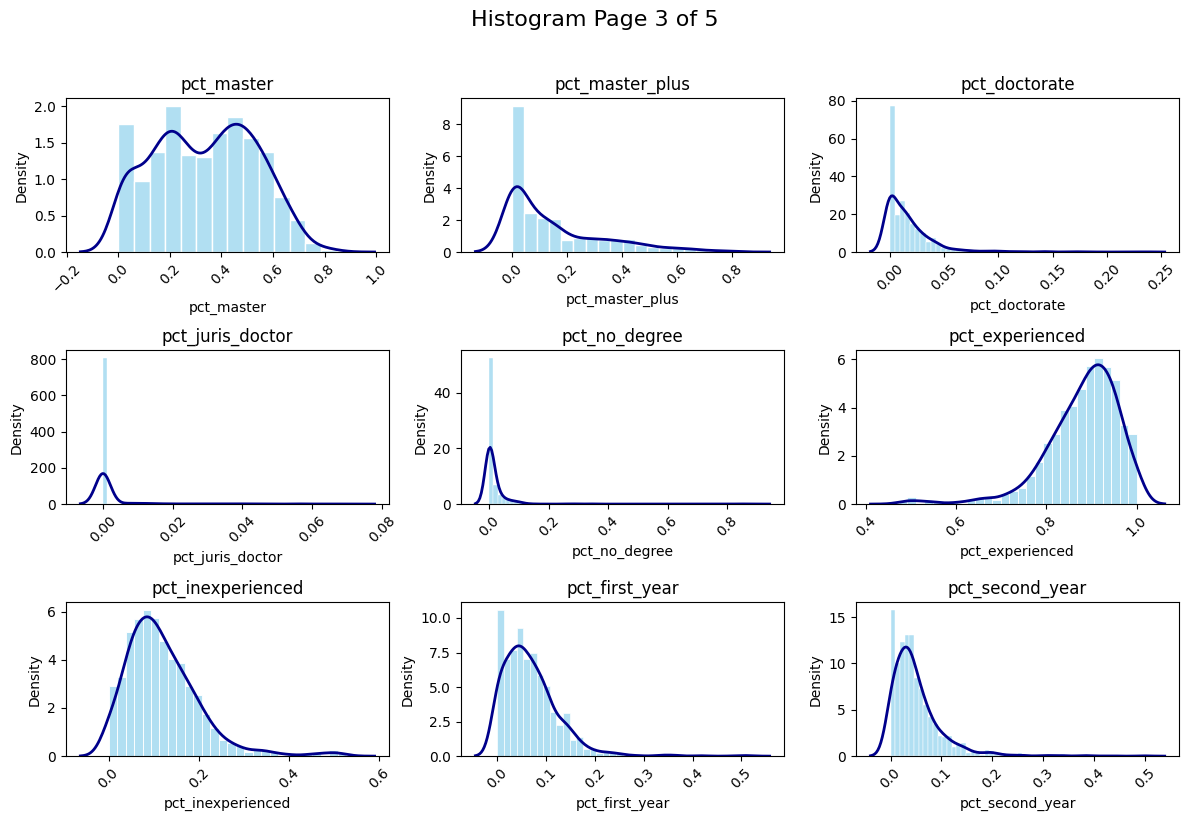

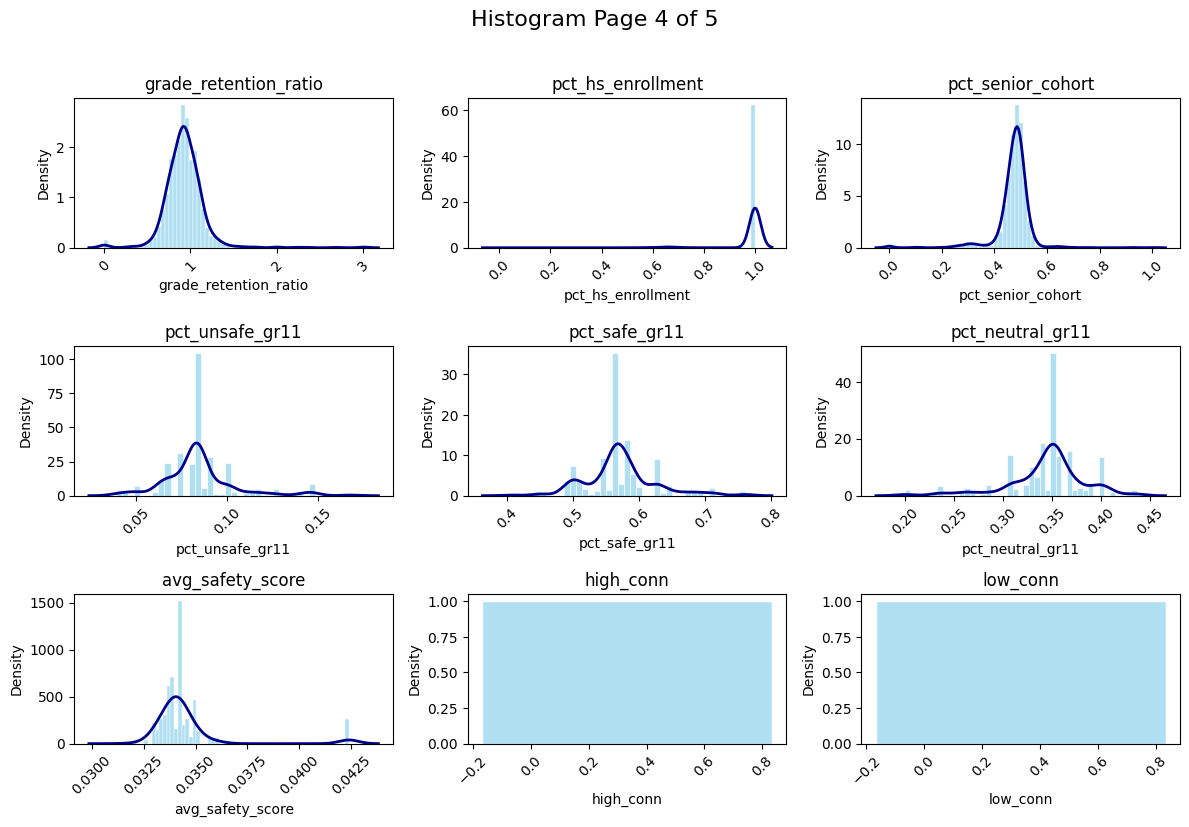

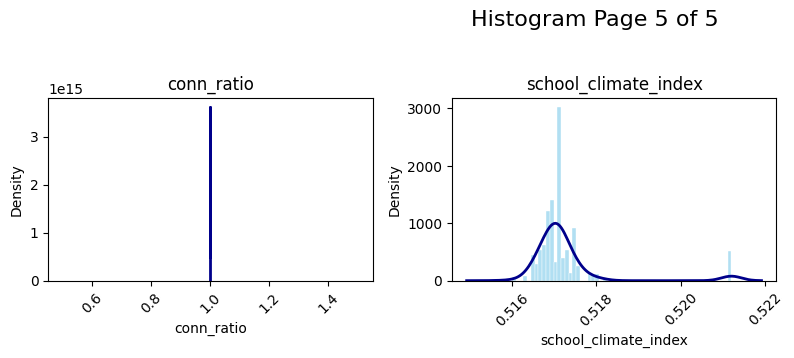

In [18]:
n_cols = 3   # columns per page
n_rows = 3   # rows per page
plots_per_page = n_cols * n_rows
num_pages = math.ceil(len(num_cols) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = start + plots_per_page
    subset = num_cols[start:end]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        ax=axes[i]
        sns.histplot(df[col],
                     ax=ax,
                     bins="auto", 
                     color="skyblue", 
                     alpha=0.65, 
                     stat="density",
                     edgecolor="white",
                     kde=False, 
                     )
        
        # KDE overlay
        sns.kdeplot(df[col], ax=ax, color="darkblue", linewidth=2, warn_singular=False)

        axes[i].set_title(col)
        axes[i].tick_params(axis="x", rotation=45)

    # hide unused subplots (for last page)
    for j in range(len(subset), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"Histogram Page {page + 1} of {num_pages}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


#### Observation

The target variable is `regular_hs_diploma_graduates_rate`. A secondary target variable is `dropout_rate`. 
The target variable is left-skewed showing that most schools have high graduation rates. This also shows there's an imbalance in our target variable. 

Most of these variables are skewed and therefore would require some transformation prior to modeling. 

The following variables do not show any variability and therefore should be removed from the dataset prior to modeling: `high_conn`, `low_conn`, and `conn_ratio`. 


### Summary Statistics

In [39]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cohortstudents,991.0,362.837538,1.991024e+02,11.000000,200.000000,376.000000,500.500000,1044.000000
regular_hs_diploma_graduates_rate,991.0,91.869828,7.276695e+00,0.000000,89.300000,93.800000,96.600000,100.000000
met_uccsu_grad_reqs_rate,991.0,52.392230,1.894189e+01,0.000000,40.350000,53.000000,65.250000,100.000000
seal_of_biliteracy_rate,991.0,15.166700,1.280911e+01,0.000000,5.350000,13.700000,22.300000,84.700000
dropout_rate,991.0,4.551968,4.912416e+00,0.000000,1.300000,3.000000,6.300000,38.500000
still_enrolled_rate,991.0,1.590111,3.668865e+00,0.000000,0.000000,0.800000,2.000000,96.300000
chronicabsenteeismrate,1021.0,14.960627,1.489501e+01,0.000000,4.700000,11.000000,20.200000,85.000000
eligible_cumulative_enrollment,1020.0,1607.253922,8.682273e+02,13.000000,904.000000,1696.000000,2217.000000,4742.000000
unexcused_absences_percent,1020.0,40.230980,1.784422e+01,0.000000,27.600000,38.200000,50.225000,99.900000
outofschool_suspension_absences_percent,1020.0,1.100882,9.534449e-01,0.000000,0.400000,0.900000,1.525000,8.900000


### Box Plots

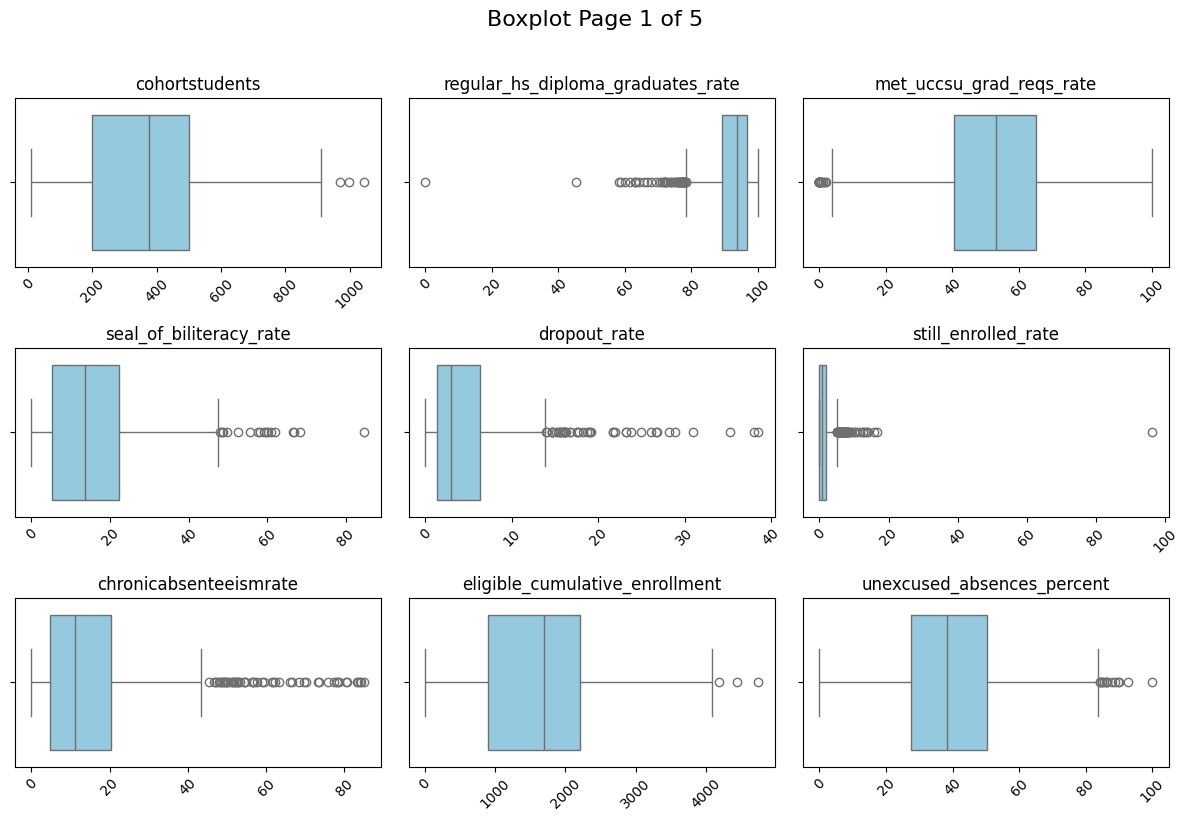

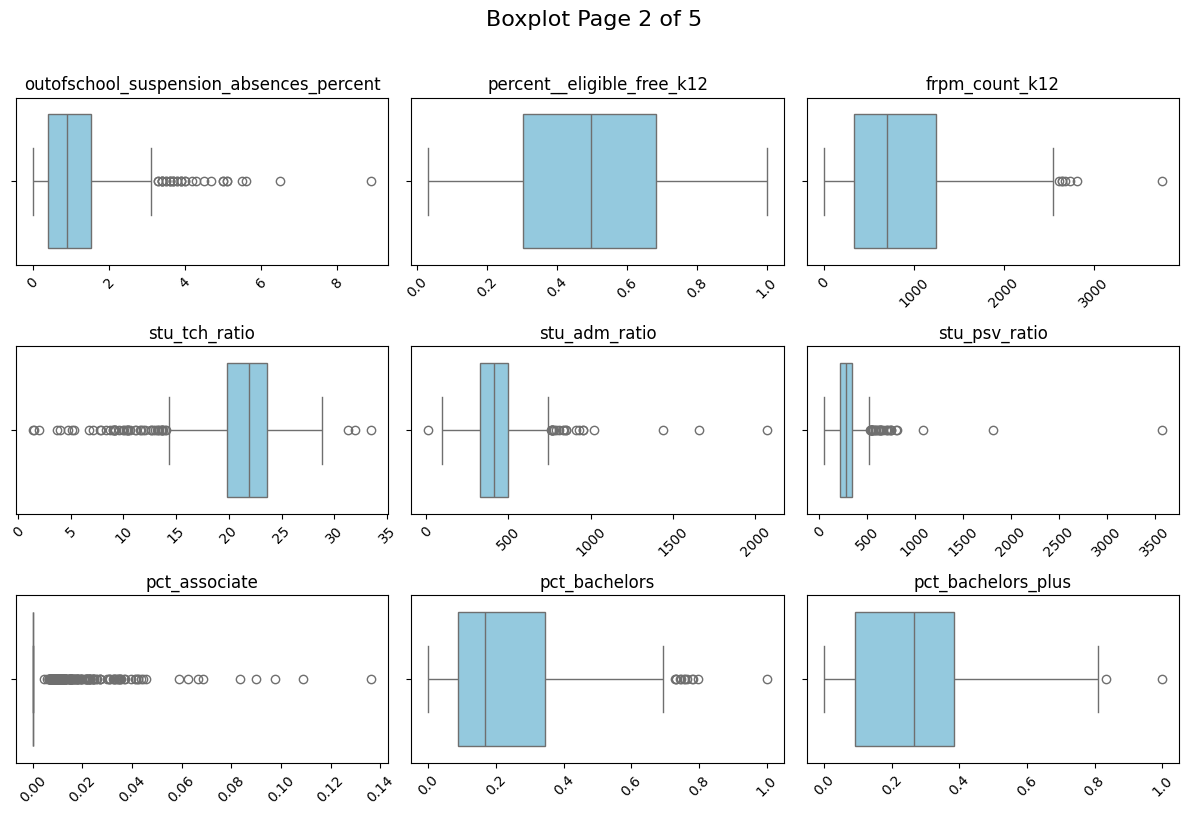

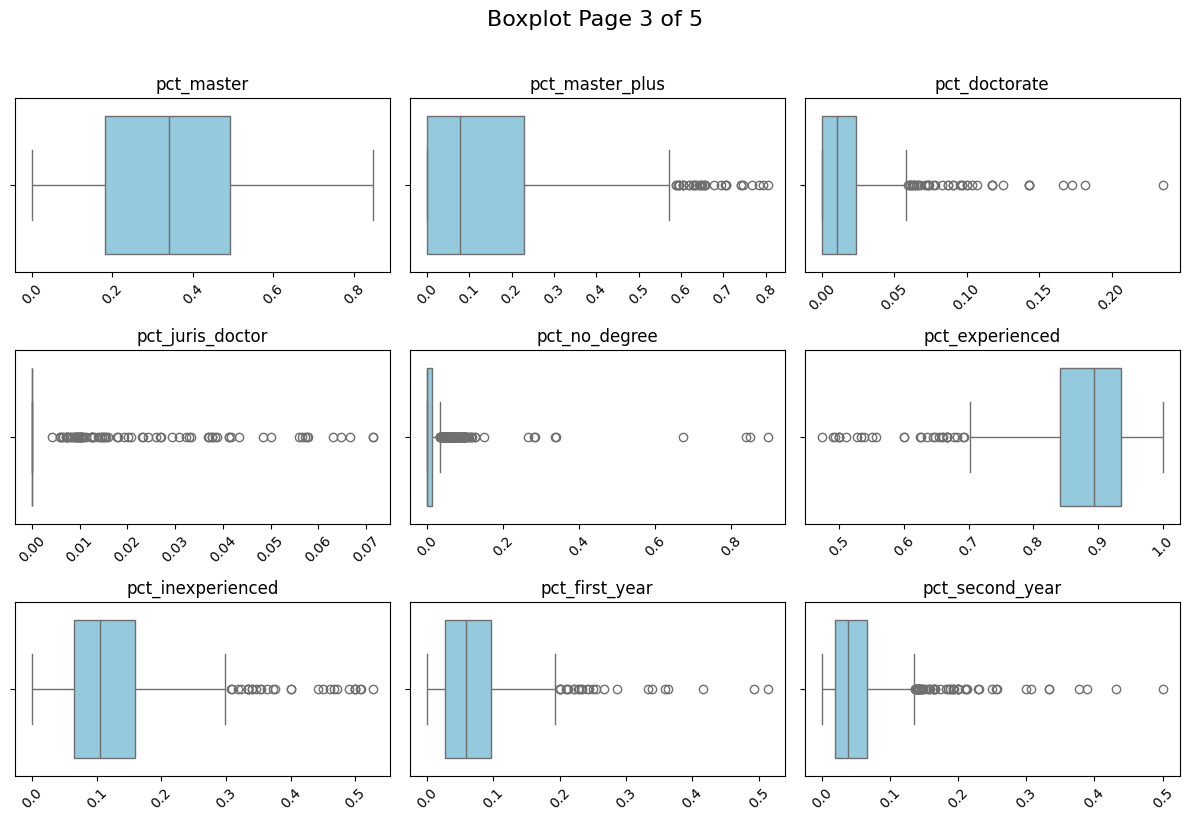

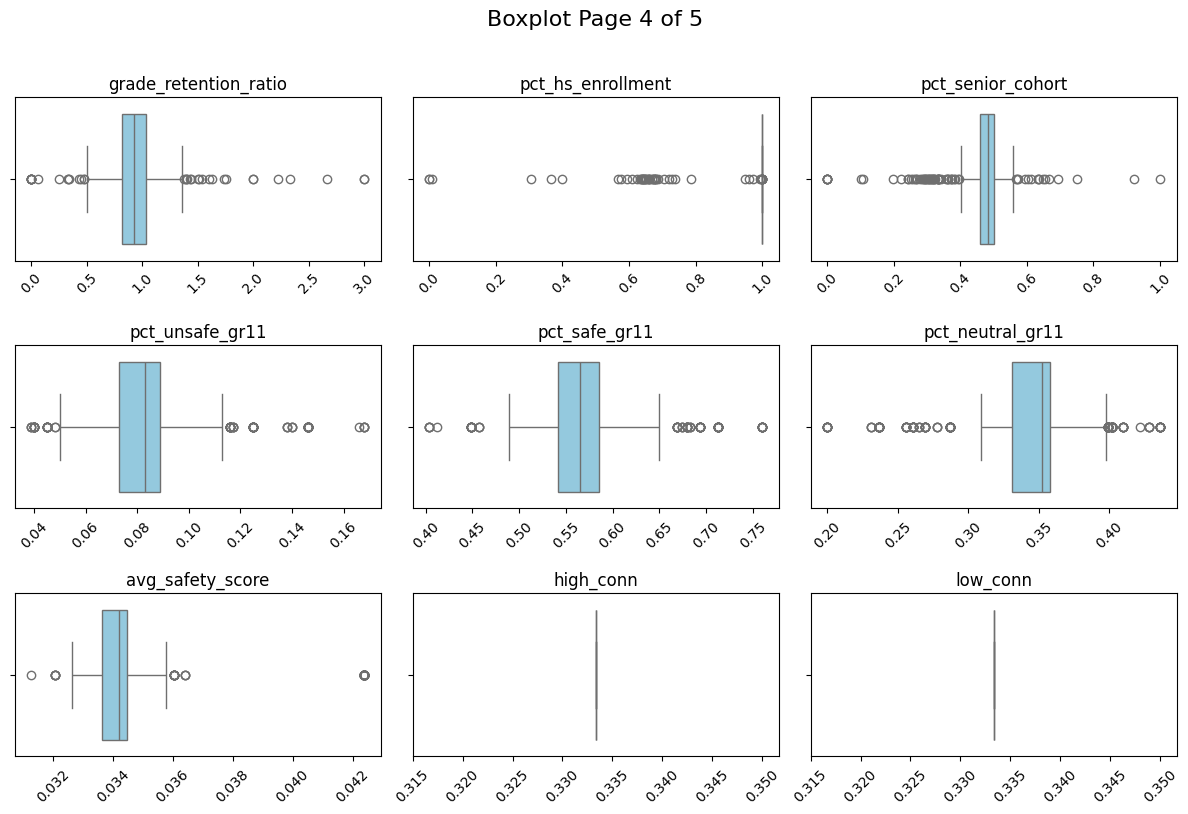

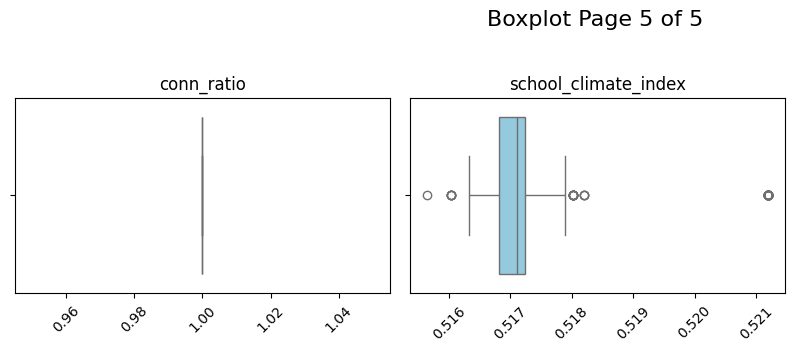

In [19]:
n_cols = 3    # number of columns per page
n_rows = 3    # number of rows per page
plots_per_page = n_cols * n_rows
num_pages = math.ceil(len(num_cols) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = start + plots_per_page
    subset = num_cols[start:end]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis="x", rotation=45)

    # Hide any unused subplots on the last page
    for j in range(len(subset), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"Boxplot Page {page + 1} of {num_pages}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


### Outlier Count Summary

In [20]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers.sort_values(ascending=False)

pct_associate                              201
pct_neutral_gr11                           165
pct_no_degree                              123
pct_unsafe_gr11                             89
pct_juris_doctor                            82
pct_safe_gr11                               75
pct_senior_cohort                           70
still_enrolled_rate                         65
school_climate_index                        63
avg_safety_score                            63
pct_second_year                             56
chronicabsenteeismrate                      54
pct_hs_enrollment                           52
stu_tch_ratio                               52
regular_hs_diploma_graduates_rate           48
dropout_rate                                44
pct_doctorate                               42
grade_retention_ratio                       36
pct_master_plus                             33
outofschool_suspension_absences_percent     33
stu_psv_ratio                               33
pct_experienc

In [21]:
outlier_summary = (
    outliers
    .to_frame("Outlier Count")
    .assign(Outlier_Pct=lambda x: (x["Outlier Count"] / len(df) * 100).round(2))
    .sort_values("Outlier Count", ascending=False)
)

outlier_summary.style.background_gradient(cmap="Blues").format({
    "Outlier_Pct": "{:.2f}%"
}).set_caption("Outlier Summary (Count and Percentage)")


,Outlier Count,Outlier_Pct
pct_associate,201,18.84%
pct_neutral_gr11,165,15.46%
pct_no_degree,123,11.53%
pct_unsafe_gr11,89,8.34%
pct_juris_doctor,82,7.69%
pct_safe_gr11,75,7.03%
pct_senior_cohort,70,6.56%
still_enrolled_rate,65,6.09%
school_climate_index,63,5.90%
avg_safety_score,63,5.90%


## Categorical Features

In [22]:
df_cat.head()

,virtual,magnet,yearroundyn,multilingual,target_grad_category
0,N,N,N,N,Graduated / On Track
1,N,N,N,N,Graduated / On Track
2,N,N,N,Y,Graduated / On Track
3,N,N,N,N,Graduated / On Track
4,V,N,N,N,Graduated / On Track


### Cardinality Report

In [37]:
jrep.data_cardinality(df_cat, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 5

[BINARY COLUMNS]
There are 2 binary columns.
 * Columns: ['yearroundyn', 'target_grad_category']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 0 constant columns.
There are 1 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 5 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values
 * target_grad_category: 2 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


### Frequency and Percentage

In [25]:
for col in cat_cols: 
    print(f"\n {col.upper()}")
    display(
        pd.DataFrame({
            "Count": df_cat[col].value_counts(dropna=False),
            "Percent": (df_cat[col].value_counts(normalize=True) * 100).round(2)
        })
    )


 VIRTUAL


,Count,Percent
virtual,,
N,676,63.36
C,388,36.36
V,3,0.28



 MAGNET


,Count,Percent
magnet,,
N,937,87.82
Y,105,9.84
No Data,25,2.34



 YEARROUNDYN


,Count,Percent
yearroundyn,,
N,1014,95.03
Y,53,4.97



 MULTILINGUAL


,Count,Percent
multilingual,,
N,919,86.13
Y,122,11.43
No Data,26,2.44



 TARGET_GRAD_CATEGORY


,Count,Percent
target_grad_category,,
Graduated / On Track,933,87.44
Not Graduated / At Risk,134,12.56


### Count Plots

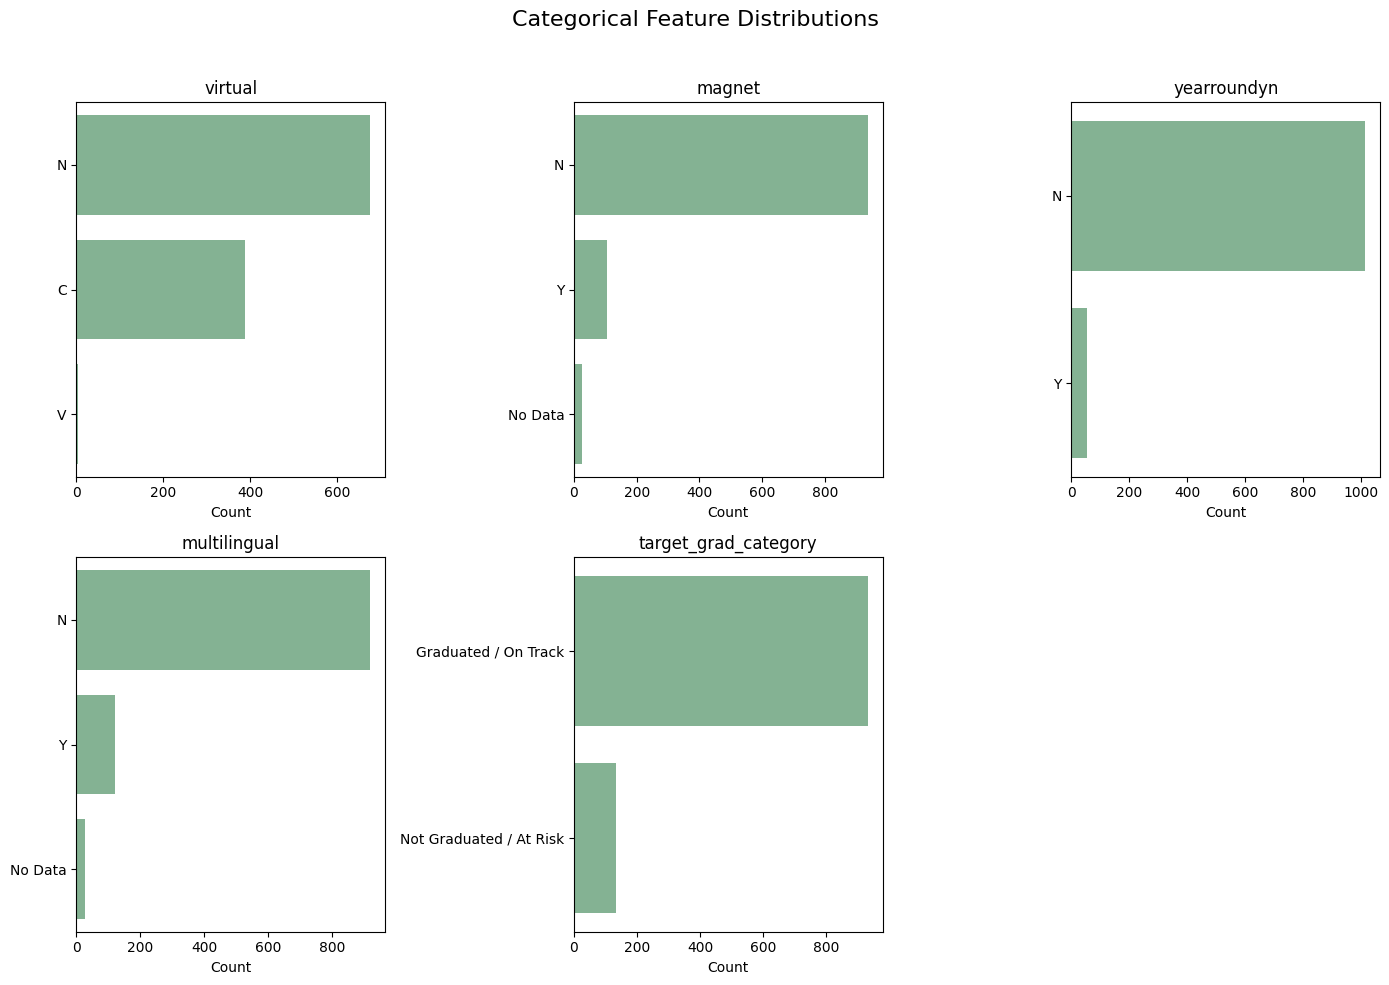

In [32]:
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        y=col,
        data=df_cat,
        order=df_cat[col].value_counts().index,
        color=sns.color_palette("crest")[0],   # <--- fixed
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Categorical Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [27]:
df_cat.describe().T

,count,unique,top,freq
virtual,1067,3,N,676
magnet,1067,3,N,937
yearroundyn,1067,2,N,1014
multilingual,1067,3,N,919
target_grad_category,1067,2,Graduated / On Track,933


### Feature Summary

In [35]:
cat_summary = pd.DataFrame({
    "Unique Categories": df[cat_cols].nunique(),
    "Most Frequent Category": df[cat_cols].mode().iloc[0],
    "Missing Values": df[cat_cols].isna().sum()
})

cat_summary.style.background_gradient(cmap="Greens").set_caption("Categorical Feature Summary")


,Unique Categories,Most Frequent Category,Missing Values
virtual,3,N,0
magnet,3,N,0
yearroundyn,2,N,0
multilingual,3,N,0
target_grad_category,2,Graduated / On Track,0


/tmp/ipykernel_484163/321096384.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_grad_category', data=df, palette=['skyblue', 'salmon'])


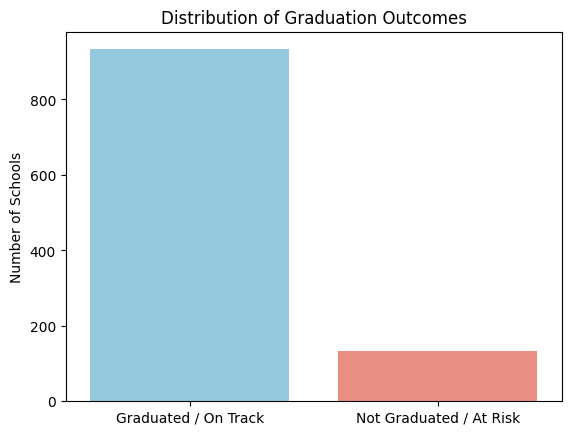

target_grad_category
Graduated / On Track       87.44
Not Graduated / At Risk    12.56
Name: proportion, dtype: float64

In [38]:
sns.countplot(x='target_grad_category', data=df, palette=['skyblue', 'salmon'])
plt.title("Distribution of Graduation Outcomes")
plt.xlabel("")
plt.ylabel("Number of Schools")
plt.show()

df['target_grad_category'].value_counts(normalize=True).mul(100).round(2)
